<h2><b><u>Case Study: Heart Disease Dataset</u></b></h2>
<h2> Part 2 of 3: Statistical Testing  </h2>

<b>Background</b> for this case study can be found in the part 1 Exploratory Data Analysis portion of this case study.
<h3><b><i> Case Study Goal</i></b></h3>
<p> With the magnitude of how deadly heart disease is, and how it occurs prematurely with individuals under 70 in many cases, what, if any, are indicators to help pre diagnose individuals who share attributes with those who have experienced CVD? </p>

<p>It is our goal to determine how the above attributes correlate with heart disease, determine if those findings are significant, and create a prediction to evaluate ones's risk of heart disease based on their attributes values using correlation calculations, decision tree classifications, and logistic regression model. </p>

<h3><b> This Assignment: Statitstical Testing</b> </h3>
<p> The purpose of statistical testing is to determine if the findings we observed in the last EDA step are significant. We will be using different types of hypthesis testing. Hypothesis testing accepts the formal procedures used to accept or reject a statistical hypothesis (what we observed in our EDA). The following are the steps for hypothesis tests: </p>
<ol>
    <li>Begin by assuming that a hypothesis is true</li>
    <li>Next, consider whether the data are consistent with the hypothesis</li>
    <li>If the data is consistent with the original hypothesis (null hypothesis) we retain/accept that the null hypothesis as true. <b>We never prove the null</b>. </li>
    <li>If the data is not consistent with the original claim (the null hypothesis), we determine whether we believe beyond a reasonable doubt that the original hypothesis is false</li>
   
</ol>

<h5> Testing hypothesis </h5>
<ul>
    <li> The null hypothesis, which we will denote as H<sub>O</sub>, specifies a population model parameter of interest and proposses a value for that parameter. In our case, it will be comparing the two different means. </li>
    <li>We then ask how likely it is to get results like we did if the null hypothesis were true </li>
  <b>For more background on Hypotehsis Testing  <a href="https://www.youtube.com/watch?v=UcZwyzwWU7o" >Click Here</a></b>
<h4><b>Loading the Data and Importing the Packages</b></h4>

In [7]:
# Importing the packages
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import scipy.stats.distributions as dist
import math
from statistics import stdev
from statsmodels.stats.proportion import proportions_ztest

#we will be using alpha of 0.05 for all of the hypothesis testing
alpha = 0.05

In [2]:
# Load CSV file
heart_csv = pd.read_csv("data/heart.csv")

From the previous iteration of this case study, we determined that the findings we will test are the following:
<ul>
    <li> 
        Mostly male </li>
    <li>
        Older individuals </li>
    <li> Lower heart rate </li>
    <li> Distinct old peak value </li>
    </ul>

<h3> 1. Testing the Older Age Claim </h3>
From the previous EDA, we discovered that, those who are older tend to have heart disease more so than those who are younger. The graph that was completed in the first step shows that as age increases, so does the population of people who have heart disease. From the heat map below, it is obvious that the concentration of ages for those with heart disease is different than that of those without heart disease.
<p> Because of this, we want to compare the means of those with heart disease and those without means. Therefore, we want to utilize a <b> 2-Sample T Hypothesis Test</b> </p>

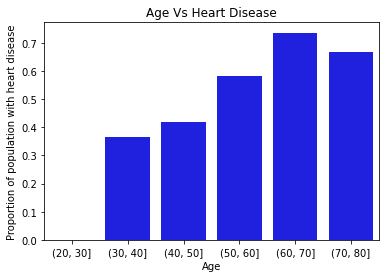

In [6]:
##Graph already done for you
# Groups Age from 20 to 90 by an increment of 10 and takes the mean of all the HeartDisease values in each group
heart_age_df = heart_csv.groupby(pd.cut(heart_csv["Age"], np.arange(20, 90, 10))).mean()
# Creates a barplot of the Age groups on the x-axis and the mean HeartDisease on the y-axis
heart_age_plot = sns.barplot(x = heart_age_df.index, y = "HeartDisease", data = heart_age_df, color = "blue")

heart_age_plot.axes.set_title("Age Vs Heart Disease")

plt.xlabel("Age")
plt.ylabel("Proportion of population with heart disease")
plt.show()

Text(0.5, 1.0, 'Heatmap of Ages by Heart Disease')

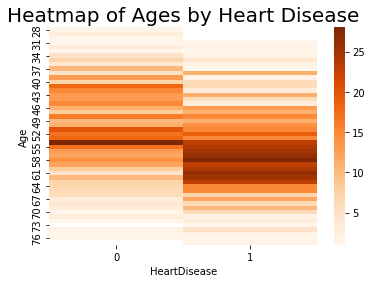

In [8]:
heart_ct = pd.crosstab(heart_csv['Age'], heart_csv['HeartDisease'], values=heart_csv['HeartDisease'], aggfunc='count')
heart_heat = sns.heatmap(heart_ct, cmap="Oranges")

plt.title('Heatmap of Ages by Heart Disease', fontsize = 20)

<h4>Hypothesis Test for Age </h4>
<p> Null Hypothesis: The true population mean age of individuals with heart disease is equal to than the true population mean of individuals without heart disease  </p>
<p> H<sub>O</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> </p>
<p> Alternative Hypothesis: The true population mean age of individuals with heart disease is not equal to than the true population mean of individuals without heart disease </p>
<p> H<sub>A</sub>: $\mu$<sub>1</sub> $\neq$ $\mu$ <sub>2</sub></p>
<p> <b> alpha = 0.05</b> </p>

In [ ]:
#subsetting the heart disease negative population
age_hd = heart_csv[heart_csv['HeartDisease'] == 0]
age_hd_mean = np.mean(age_hd['Age'])
age_hd_std = np.std(age_hd['Age'])

#subsetting the heart disease positive population
#follow the steps shown above for negative population & print the mean and standard deviation

# Perform Hypothesis Test for Age
ttest, p_value = ttest_ind(heart_csv[(heart_csv['HeartDisease'] == 1)]['Age'], heart_csv[(heart_csv['HeartDisease'] == 0)]['Age'])
alpha = 0.05

# report
print('tvalue: %0.3f, p value: %0.3f' % (ttest, p_value))

In [ ]:
if p_value > alpha:
    print('Our p-value is: %0.3f. We Fail to reject the null hypothesis. There is not sufficient evidence at alpha = %.02f to suggest that the population mean age of those with heart disease is not equal to that of those who do not have heart disease.' % (p_value, alpha))
else:
    print('Our p-value is: %0.3f. We reject the null hypothesis. There is sufficient evidence at alpha = %.02f to suggest that the population mean age of those with heart disease is not equal to that of those who do not have heart disease.' % (p_value, alpha))

<h2> 2. Testing the Lower Heart Rate Claim </h2>
From the previous EDA, we discovered that those with a lower heart rate tend to have heart disease more so than those who are have a higher heart rate. The graph that was completed in the first step shows that as heart rate lowers, so does the population of people who have heart disease. From the heat map below, it is obvious that the concentration of ages for those with heart disease is different than that of those without heart disease. This is an interesting find because usually a lower heart max rate for athletes means they are able to control their stamina.
<p> From the heatmap below, we can determine that the consntration of max heart rate for those without heart disease is higher than that of those with heart disease</p>
<p> Because of this, we want to compare the means of those with heart disease and those without means. Therefore, we want to utilize a <b> 2-Sample T Hypothesis Test</b> </p>

<h4>Hypothesis Test for Lower Heart Rate </h4>
<p> Null Hypothesis: The true population mean heart rate of individuals with heart disease is equal to than the true population mean heart rate of individuals without heart disease  </p>
<p> H<sub>O</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> </p>
<p> Alternative Hypothesis: The true population mean heart rate of individuals with heart disease is not equal to than the true population mean heart rate of individuals without heart disease </p>
<p> H<sub>A</sub>: $\mu$<sub>1</sub> $\neq$ $\mu$ <sub>2</sub></p>
<p> <b> alpha = 0.05</b> </p>

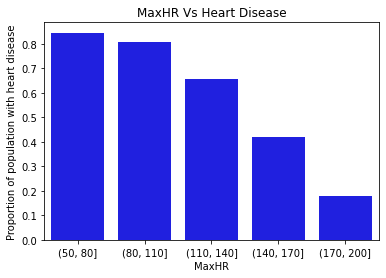

In [9]:
heart_MaxHR_df = heart_csv.groupby(pd.cut(heart_csv["MaxHR"], np.arange(50, 230, 30))).mean()

# Creates a barplot of the MaxHR groups on the x-axis and the mean HeartDisease on the y-axis
heart_MaxHR_plot = sns.barplot(x = heart_MaxHR_df.index, y = "HeartDisease", data = heart_MaxHR_df, color = "blue")
heart_MaxHR_plot.axes.set_title("MaxHR Vs Heart Disease")
plt.xlabel("MaxHR")
plt.ylabel("Proportion of population with heart disease")
plt.show()

Text(0.5, 1.0, 'Heatmap of Ages Compared to Max Heart Rate')

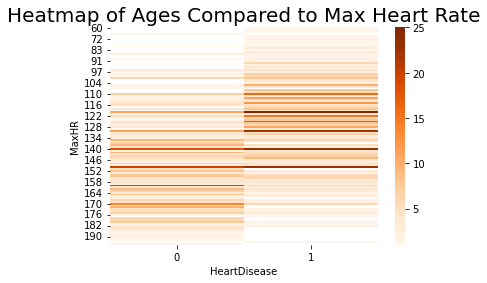

In [12]:
heart_ct = pd.crosstab(heart_csv['MaxHR'], heart_csv['HeartDisease'], values=heart_csv['HeartDisease'], aggfunc='count')
heart_heat = sns.heatmap(heart_ct, cmap="Oranges")

plt.title('Heatmap of Ages Compared to Max Heart Rate', fontsize = 20)

In [ ]:
# Calculate the mean heart rate for individuals with heart disease and individuals without heart disease
MaxHR_Disease_mean = np.mean(heart_csv[(heart_csv["HeartDisease"] == 1)]["MaxHR"])
MaxHR_No_Disease_mean = np.mean(heart_csv[(heart_csv["HeartDisease"] == 0)]["MaxHR"])

# Calculate the standard deviation of heart rate for individuals with heart disease and individuals without heart disease
# follow the steps shown above to determine the standard deviation for people with and without heart disease

# Hypothesis test
tset, pval = ttest_ind(heart_csv[(heart_csv["HeartDisease"] == 1)]["MaxHR"], heart_csv[(heart_csv["HeartDisease"] == 0)]["MaxHR"])
print("p-values: %.3f. T: %.3f" %(pval, tset))
alpha = 0.05

In [ ]:
if p_value > alpha:
    print('Our p-value is: %0.3f. We Fail to reject the null hypothesis. There is not sufficient evidence at alpha = %.02f to suggest that the population mean max heart rate of those with heart disease is not equal to that of those who do not have heart disease.' % (p_value, alpha))
else:
    print('Our p-value is: %0.3f. We reject the null hypothesis. There is sufficient evidence at alpha = %.02f to suggest that the population mean max heart rate of those with heart disease is not equal to that of those who do not have heart disease.' % (p_value, alpha))

<h2> 3. Testing the Distinct Old Peak Value Claim</h2>
From the previous EDA, we discovered that those with as old peak increases, more people tend to have heart disease.
<p> From the lineplot below, we can determine that the old peak value for those with heart disease appears distictly different than those without heart disease</p>
<p> Because of this, we want to compare the means of those with heart disease and those without means. Therefore, we want to utilize a <b> 2-Sample T Hypothesis Test</b> </p>

<h4>Hypothesis Test for Old Peak </h4>
<p> Null Hypothesis: The true population mean heart rate of individuals with heart disease is equal to than the true population mean heart rate of individuals without heart disease  </p>
<p> H<sub>O</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> </p>
<p> Alternative Hypothesis: The true population mean heart rate of individuals with heart disease is not equal to than the true population mean heart rate of individuals without heart disease </p>
<p> H<sub>A</sub>: $\mu$<sub>1</sub> $\neq$ $\mu$ <sub>2</sub></p>
<p> <b> alpha = 0.05</b> </p>

Text(0.5, 1.0, 'Old Peak by Age hued on Heart Disease')

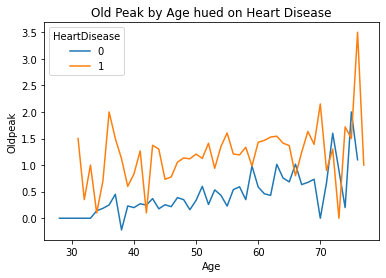

In [14]:
heart_line = sns.lineplot(data=heart_csv, x='Age',y='Oldpeak', hue='HeartDisease', ci=None)
heart_line.set_title("Old Peak by Age hued on Heart Disease")

Replicate previous T Tests for the Old Peak Values

In [15]:
# Calculate the mean oldpeak for individuals with heart disease and individuals without heart disease


# Calculate the standard deviation of Oldpeak for individuals with heart disease and individuals without heart disease


 
# Hypothesis test
alpha = 0.05

#if else pvalue statement

<h2> 4. Testing if cholesterol is or is not Significant </h2>
<p> From the EDA assignment we determined that there does not appear to be a determining cholesterol level that signifies heart disease or not heart disease. Therefore, if we do a <b> 2-Sample T Test</b>, the p value should be greater than that of the alpha level at 0.05. </p>

<h4>Hypothesis Test for Cholesterol </h4>
<p> Null Hypothesis: The true population mean Cholseterol level of individuals with heart disease is equal to than the true population mean heart rate of individuals without heart disease  </p>
<p> H<sub>O</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> </p>
<p> Alternative Hypothesis: The true population mean Cholseterol level of individuals with heart disease is not equal to than the true population mean heart rate of individuals without heart disease </p>
<p> H<sub>A</sub>: $\mu$<sub>1</sub> $\neq$ $\mu$ <sub>2</sub></p>
<p> <b> alpha = 0.05</b> </p>

In [4]:
# Calculate the mean heart rate for individuals with heart disease and individuals without heart disease
#print values

# Calculate the standard deviation of heart rate for individuals with heart disease and individuals without heart disease
#print values

# Hypothesis test

alpha = 0.05

#if pvalue statement

<h3> 5. Testing Mostly Male Proportion Claim</h3>
From the previous EDA, we discovered that, the proportion of the male population with Heart Disease is greater than that of the proportion of women with Heart Disease. Because we are testing proportions, we will need to do a 2 sample Z test on proportions. The heatmap below is the completed version of the one created from the previous EDA step where this is visualized. Following the cross tab diagram, the actual proportions for male and female are completed. 

Text(33.0, 0.5, 'Sex of Patient')

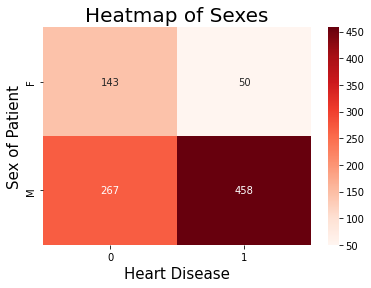

In [6]:
#showing sex with Heart Disease
heat_sex = pd.crosstab(heart_csv['Sex'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')

#heat map of sexes with heart disease
sns.heatmap(heat_sex,annot=True, cmap= 'Reds',fmt='g')
#labels for heatmap
plt.title('Heatmap of Sexes', fontsize = 20) 
plt.xlabel('Heart Disease', fontsize = 15) 
plt.ylabel('Sex of Patient', fontsize = 15)

<b>The best statistical test for this type of data is a <b> 2-Sample Proportion Z Test</b>. 
<p> Please follow one of the two methods written out in the <b>Z_test_Practice</b> file that is included in the folder to complete this test. The examples follow the 2 sample proportion z test for the varibale exercise angina. Although they are different variables, the set up is the exact same. Run the examples and choose a method to utilize for this test. </p>

The best statistical test for this type of data is a <b> 2-Sample Proportion Z Test</b>. 
<p>The data required for a 2-Sample Proportion Z Test is the successes of x1 (the amount of men with heart disease), n1 the size of the sample of the first proportion (amount of men in dataset), number of successes x2 (the amount of women with heart disease), and n2 the size of the sample of the second proportion (amount of women in dataset)</p>
<b> Conditions for 2-Sample Z Test</b>
<ul>
    <li> 
        Independent Random Samples</li>
    <li>
        n $\lt$ of the population for both samples</li>
    <li> n*$\hat{p}$ $\ge$ 10 </li>
    <li> n*$\hat{q}$ $\ge$ 10</li>
    </ul>
    
 <p> Both <b> are random samples</b></p>
 <p> <b>n $\lt$ 10%</b> of the population for both the populations of men and women </p>
 <p> Need to calculate <b> $\hat{p}$ and $\hat{q}$</b> for the last condition</p>

<h4> Concluding Question</h4>
Of the tests we did, put all the statistical findings in one conlcuding statement

<h2> Next Part: Predictive Measures</h2>
<p> Within our predictive measures, we want to determine if there are variables that can be used to predict if one has a high chance of having heart disease or not. </p>